In [1]:
import glob
import numpy as np

from keyrover.datasets.multiclass_dataset import *
from keyrover.vision import *
from keyrover import *

blender/masks/keyboard_2455_1.png


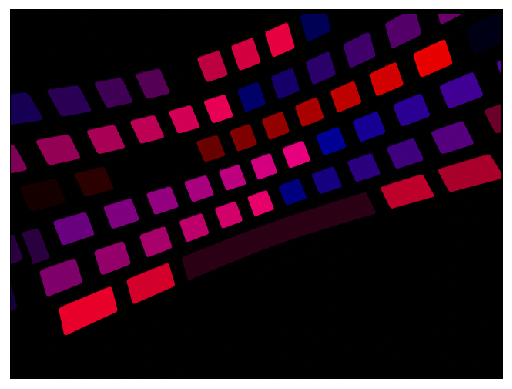

In [169]:
RAW_MASKS = "blender/masks"
SEGMENTATION_DATASET = "blender/renders"

paths = glob.glob(f"{RAW_MASKS}/*.png")
mask_path = paths[0]
print(mask_path)

image_path = f"{SEGMENTATION_DATASET}/{os.path.basename(mask_path).removesuffix('.png')}.png"

image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("RGB")

binary = np.array(mask.convert("L")) > 1
classes = np.array(mask)

imshow(classes)

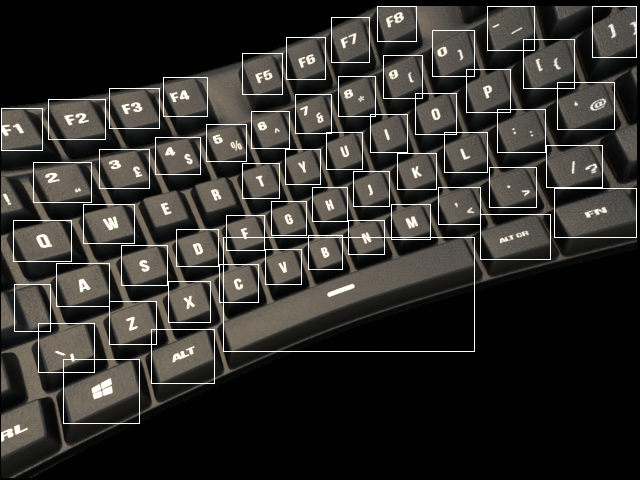

In [171]:
newimg = np.array(image)

OUTLIER_THRESHOLD = -0.5

rects = extract_rects(binary)
areas = np.array(list(map(lambda rect: rect[-1] * rect[-2], rects)))

d = areas - np.median(areas)
mdev = np.median(areas)
s = d / mdev if mdev else np.zeros(len(d))

rects = zip(s, rects)
rects = list(filter(lambda rect: rect[0] > OUTLIER_THRESHOLD, rects))

_, rects = zip(*rects)

for rect in rects:
    cv2.rectangle(newimg, rect, (255, 255, 255), 1)

Image.fromarray(newimg)

In [172]:
palette = np.array([key_to_color(i) for i in range(118)])

id_to_key = {
    1: "Q", 2: "W", 3: "E", 4: "R", 5: "T", 6: "Y", 7: "U", 8: "I", 9: "O", 10: "P",
    11: "[", 12: "]",
    
    14: "space",
    
    13: "lcontrol", 
    15: "up", 16: "left", 17: "down", 18: "right",
    
    19: "delete", 20: "end", 21: "pg down", 22: "insert", 23: "home", 24: "pg up", 25: "print", 26: "lock", 27: "pause",
    
    29: "rshift", 30: "rcontrol",
    31: "menu", 32: "fn", 33: "ralt", 34: "lalt", 35: "windows", 36: "control", 37: "lshift", 38: "caps lock", 39: "ltab",
    40: "esc",

    49: "f1", 50: "f2", 51: "f3", 52: "f4", 45: "f5", 46: "f6", 
    47: "f7", 48: "f8", 41: "f9", 42: "f10", 43: "f11", 44: "f12",
    
    53: "`",

    54: "1", 55: "2", 56: "3", 57: "4", 58: "5", 59: "6", 60: "7", 61: "8", 62: "9", 63: "0",
    
    64: "-", 65: "+", 66: "|", 
    
    67: "Z", 68: "X", 69: "C", 70: "V", 71: "B", 72: "N", 73: "M", 74: "<", 75: ">", 76: "?",
    77: "A", 78: "S", 79: "D", 80: "F", 81: "G", 82: "H", 83: "J", 84: "K", 85: "L", 86: ";",
}

palette[0], palette[-1]

(array([0, 0, 0]), array([189,   0, 189]))

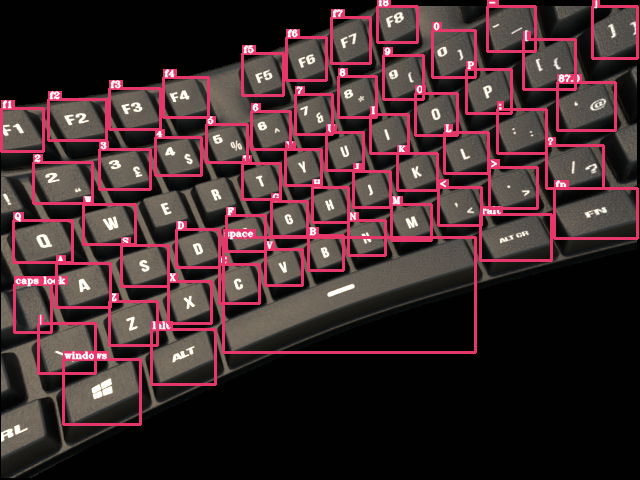

In [189]:
from scipy.spatial import cKDTree

crops = []

newimg = np.array(image)

for x, y, w, h in rects:
    crop = classes[y:y + h, x:x + w]
    crop = palette[cKDTree(palette).query(crop, k=1)[1]]
    crops.append(crop)
    
    crop = np.vstack(crop)
    crop = crop[(crop != 0).any(axis=-1)]
    color = np.median(crop, axis=0)
    
    i = color_to_key(color)
    draw_textbox(newimg, (x, y), (x + w, y + h), text=id_to_key.get(i, str(i)), scale=1, size=0.3)


Image.fromarray(newimg)

In [168]:
color_to_i((100, 0, 185))

100